## EDA

* NOTE: The data for this project was collected for personal, non-commercial use. Reviewer names and review IDs are NOT collected. Data files are NOT stored in this GitHub repo to prevent any potential unsanctioned distribution of data from the original source


In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.colors

%matplotlib inline

In [2]:
# Functions
def show_bar_plot(my_data, my_figsize, my_color, my_titletext, my_xlabeltext, my_ylabeltext, rowcount_for_percent=0):
    my_data.plot.bar(fontsize=12, rot=0, alpha=0.85, figsize=my_figsize, color=my_color)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.yticks(size=12)
    bar_labels = my_data.values
  
    for i in range(len(my_data.values)):
        the_bar_label = bar_labels[i]
        if rowcount_for_percent > 0:
            the_bar_label = get_pretty_percent(bar_labels[i], rowcount_for_percent) 
        plt.text(x=i, y=bar_labels[i], s=the_bar_label, size=12, rotation=0, color='black', ha='center', va='bottom')
    plt.show()


def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return "{:.1%}".format(percentage)

In [3]:
# Read in the data
reviews_df = pd.read_csv('../data/prepped_reviews.csv')

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1500 non-null   object
 1   star_rating      1500 non-null   object
 2   country          1500 non-null   object
 3   datetime         1500 non-null   object
 4   content          1500 non-null   object
 5   reviewYear       1500 non-null   int64 
 6   reviewYearMonth  1500 non-null   object
 7   rating           1500 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 93.9+ KB


In [5]:
# min and max year for Review - Assuming time is in GMT. Verify this if possible.
print(f"Min review time: {reviews_df['datetime'].min()}")
print(f"Max review time: {reviews_df['datetime'].max()}")

Min review time: 2020-02-04 10:46:46+00:00
Max review time: 2021-06-21 07:42:01+00:00



## What were the review counts by year? 

### Counts are below. It is interesting to note that 2021 has almost 4 times the number of reviews submitted over the entire year of 2020. 2021 reviews only cover 6 months. 

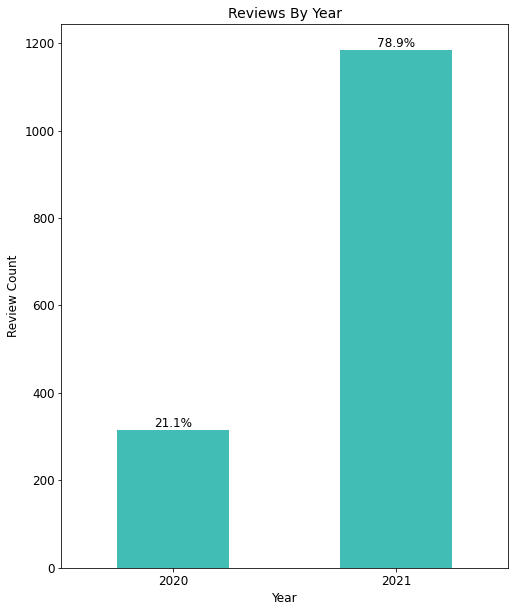

In [21]:
by_year = reviews_df.groupby(['reviewYear'])['id'].count()
by_year.sort_index()

show_bar_plot(my_data=by_year, 
              my_figsize=(8, 10), 
              my_color='lightseagreen', 
              my_titletext='Reviews By Year', 
              my_xlabeltext='Year',
              my_ylabeltext='Review Count',
              rowcount_for_percent=reviews_df.shape[0]
              )


## What were the review counts by Rating?

### Counts are below. The good news is that 5-star reviews make up the majority of all reviews in this dataset (67.9%).  However, 1-star reviews make up 15.2% of the total reviews. 

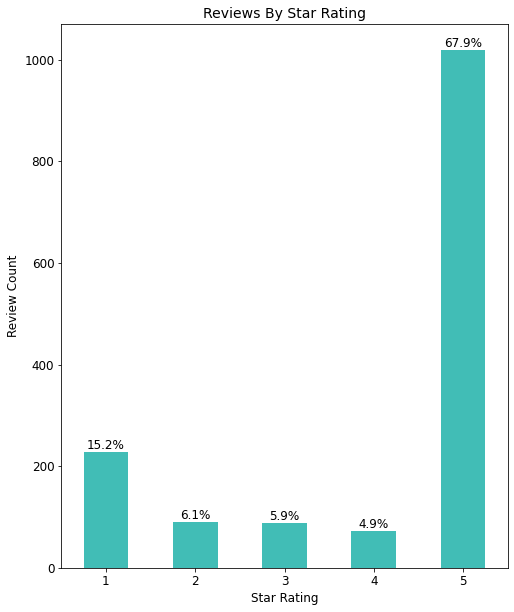

In [20]:
by_rating = reviews_df.groupby(['rating'])['id'].count()
by_rating.sort_index()

show_bar_plot(my_data=by_rating, 
              my_figsize=(8,10), 
              my_color='lightseagreen', 
              my_titletext='Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='Review Count',
              rowcount_for_percent=reviews_df.shape[0])

In [8]:
by_location = reviews_df.groupby(['country'])['id'].count()
by_location.sort_values(ascending=False)


country
US    946
GB    443
CA     19
AU     10
NL     10
IE      9
BE      5
CH      5
SG      4
ZA      3
MY      3
NO      3
MX      3
HK      2
FR      2
ES      2
IL      2
AT      2
DE      2
JE      2
QA      2
TT      2
FI      1
VE      1
TW      1
BA      1
TR      1
SI      1
SE      1
SA      1
VN      1
IT      1
PK      1
GT      1
PH      1
HR      1
HU      1
PE      1
LT      1
IN      1
AE      1
Name: id, dtype: int64

## Which countries provide the most reviews?
### Almost all of the reviews in this dataset come from the Great Britain or the United States. There are slightly more than twice as many US reviews as British reviews. 

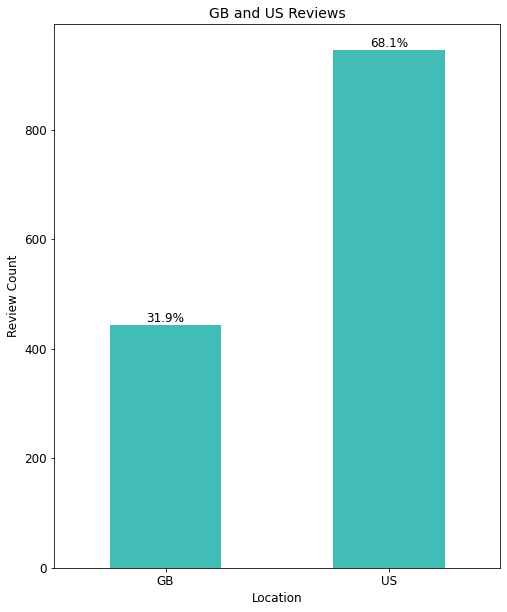

In [19]:
gb_and_us_reviews = reviews_df[reviews_df['country'].isin(['GB','US'])]
by_primary_locations = gb_and_us_reviews.groupby(['country'])['id'].count()
by_primary_locations.sort_values()

show_bar_plot(my_data=by_primary_locations, 
              my_figsize=(8,10), 
              my_color='lightseagreen', 
              my_titletext='GB and US Reviews', 
              my_xlabeltext='Location',
              my_ylabeltext='Review Count',
              rowcount_for_percent=gb_and_us_reviews.shape[0])

## Are there differences in Star Rating between the British and US reviews?

### For this dataset, US reviews had a higher percentage of 5-star reviews than British reviews. British reviews had a higher percentage of 1-star reviews than the US reviews.

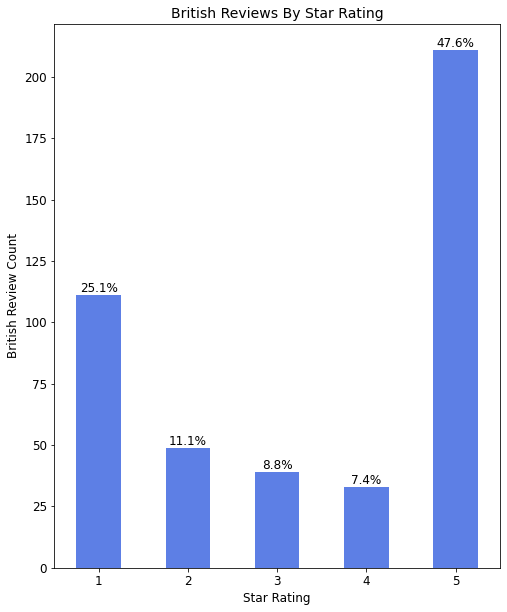

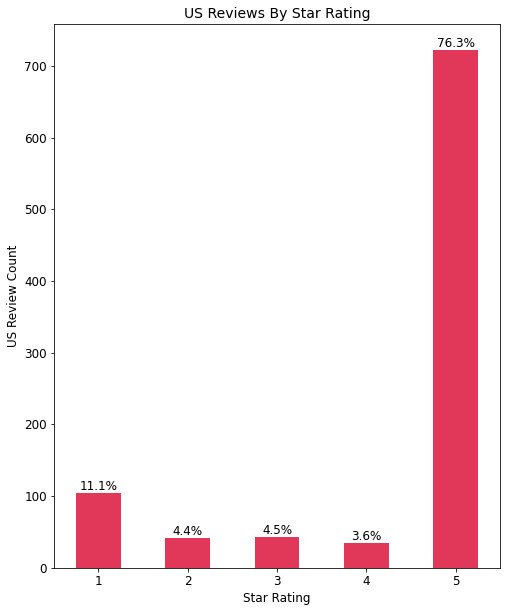

In [18]:
gb_reviews = reviews_df[reviews_df['country'] =='GB']
gb_ratings = gb_reviews.groupby(['rating'])['id'].count()
gb_ratings.sort_index()
show_bar_plot(my_data=gb_ratings, 
              my_figsize=(8,10), 
              my_color='royalblue', 
              my_titletext='British Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='British Review Count',
              rowcount_for_percent=gb_reviews.shape[0])


us_reviews = reviews_df[reviews_df['country'] =='US']
us_ratings = us_reviews.groupby(['rating'])['id'].count()
us_ratings.sort_index()
show_bar_plot(my_data=us_ratings, 
              my_figsize=(8,10), 
              my_color='crimson', 
              my_titletext='US Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='US Review Count',
              rowcount_for_percent=us_reviews.shape[0])

## How have the product review counts changed over time in this dataset?

### Analysing review counts (combined and grouped by Low, Mid, and Top star ratings) reveals some interesting trends. 

- There are few reviews from February 2020 through November 2020.
- The first spike in review counts occurs in December 2020 with ~220 reviews. 
    - Where sales offered or new/updated products launched around December 2020?  Internet research reveals that a 15% discount on the Elvie Pump was offered in September 2020 and the Elvie Curve and Elvie Catch products were launched in October 2020. Might these discounts and new product rollouts factor into the increase in reviews?
    - Where any marketing campaigns launched during this time? This is unknown.

- Review counts decline sharply from January 2021 through March 2021.

- Revew count rise dramatically in April 2021, spiking to ~400 reviews in May 2021. 
- Review counts for June 2021 show a decline from May's peak but are slightly higher than the April review counts.
- It is also interesting to note that the gap between Top (5 star) and Low (2-1 star) reviews widens dramatically in April 2021. This gap remains for the rest of the reported data. 
    - Where sales offered  or any new/ updated products launched around April 2021? Internet research reveals that a 15% discount on the Elvie Pump was offered in March 2021.
    - Where any marketing campaigns launched during this time? Where process improvements made to improve the customer experience?  This is current unknown.


Links:
* [September 2020 discount on Elvie Pump](https://www.msn.com/en-gb/lifestyle/other/the-elvie-breast-pump-is-on-sale-its-a-game-changer-ive-even-used-it-on-zoom-calls/ar-BB14L8C5)
* [October 2020 launch of Elvie Curve and Elvie Catch products](https://closeronline.co.uk/shopping/fitness/elvie-catch-elvie-curve-review/)
* [March 2021 discount on Elvie Pump](https://www.gurujihub.com/elvie-breast-pump-sale/)


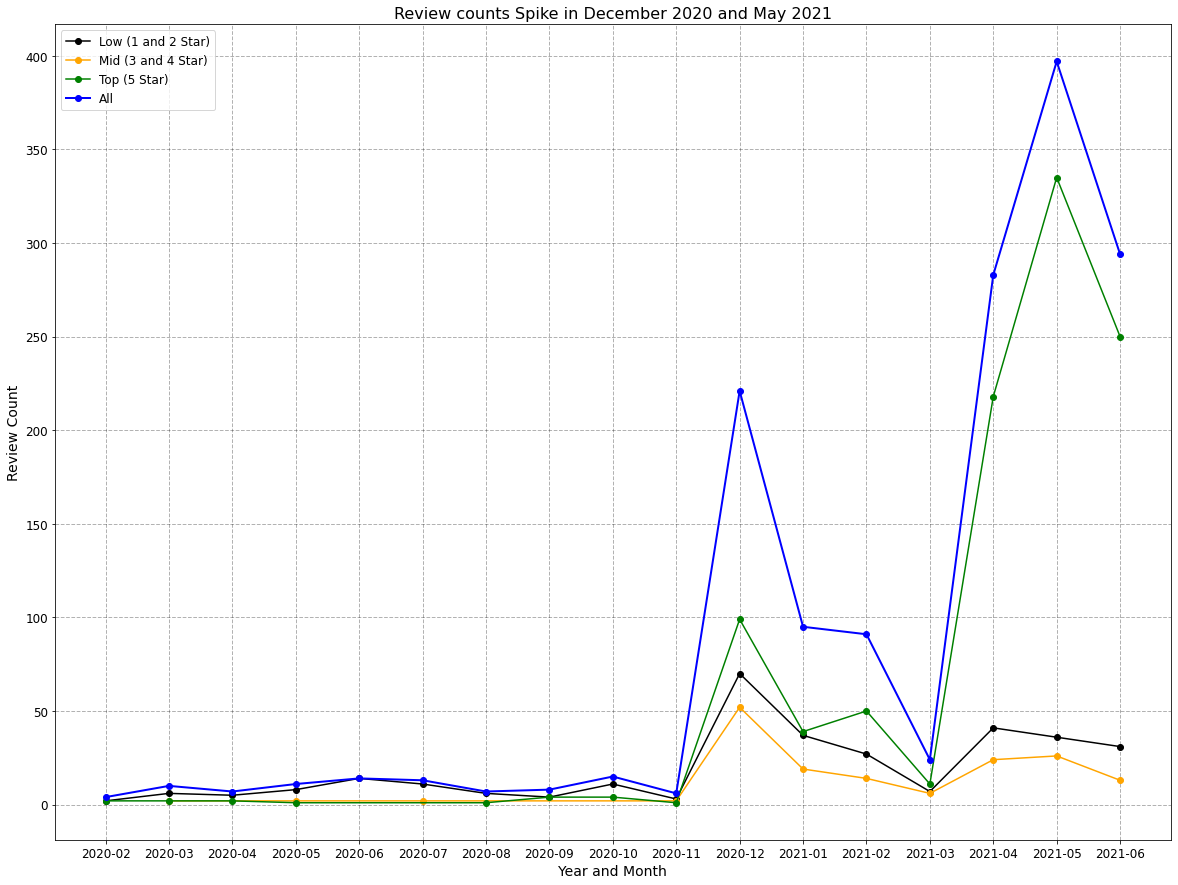

In [11]:
low_reviews_by_ym = reviews_df[reviews_df['rating'].isin([2,1])].groupby(['reviewYearMonth'])['id'].count()
mid_reviews_by_ym = reviews_df[reviews_df['rating'].isin([3,4])].groupby(['reviewYearMonth'])['id'].count()
top_reviews_by_ym = reviews_df[reviews_df['rating'] == 5].groupby(['reviewYearMonth'])['id'].count()
all_reviews_by_ym = reviews_df.groupby(['reviewYearMonth'])['id'].count()


plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12) #fontsize of the y tick labels
plt.rc('legend', fontsize=12) #fontsize of the legend

plt.figure(figsize=(20, 15))
plt.plot(low_reviews_by_ym.index, low_reviews_by_ym, color='black', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(mid_reviews_by_ym.index, mid_reviews_by_ym, color='orange', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(top_reviews_by_ym.index, top_reviews_by_ym, color='green', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(all_reviews_by_ym.index, all_reviews_by_ym, color='blue', linewidth=2.0, marker='o', linestyle='solid')
#plt.xticks(rotation=15)
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)

plt.title('Review counts Spike in December 2020 and May 2021')
plt.xlabel('Year and Month')
plt.ylabel('Review Count')
plt.legend(['Low (1 and 2 Star)','Mid (3 and 4 Star)', 'Top (5 Star)', 'All'], loc=2)

plt.show()

## Can we analyse frequently used words/bigrams in product reviews for more insight into customer product sentiment?  Compare the most frequent words for each review group (Top, Mid, and Low).
### Word clouds with the most frequent words/bigrams for Top, Mid, and Low star reviews are below. Scroll down for more details.


In [12]:
from wordcloud import WordCloud, STOPWORDS

def join_all_reviews(content_series):
    all_reviews = " ".join(review.lower() for review in content_series)
    return all_reviews

def plot_wordcloud(text, word_max, bg_color='white', cm='ocean'):
    ''' Plot a word cloud from the given text. '''
    my_stopwords = set(STOPWORDS)
    my_stopwords.add('elvie')

    cloud = WordCloud(min_word_length=3,
                      background_color=bg_color,
                      max_words=word_max,
                      max_font_size=80,
                      min_font_size=10,
                      stopwords=my_stopwords,
                      collocation_threshold = 4,
                      colormap=cm).generate(text)
    
    # plot it
    plt.figure(figsize=(15,10))
    plt.imshow(cloud, interpolation='bilinear') 
    plt.axis("off")
    plt.show()


In [13]:
#  Get the review text for Top, Mid, and Low star ratings.
top_series = reviews_df[reviews_df['rating'] == 5]['content']
mid_series = reviews_df[reviews_df['rating'].isin([3,4])]['content']
low_series = reviews_df[reviews_df['rating'].isin([2,1])]['content']

top_rated_review_words = join_all_reviews(content_series=top_series)
mid_rated_review_words = join_all_reviews(content_series=mid_series)
low_rated_review_words = join_all_reviews(content_series=low_series)


## 5 Star Review Text Analysis

### 5 Star reviews have "customer service" and bigrams (two words together) that combine "customer" with positive adjectives. Ex: "exellent customer", "awesome customer", "best customer", "amazing customer", and "great customer". Assuming these bigrams are referring to customer service. 

### There is a mix of positive ("love", "recommend", "great", "like"), neutural ("replacement part", "pump", "hub", "next day"), and negative ("issue", "stopped working") words.  

### This analysis could imply that if reviewers encountered an issue, such as needing a "replacement part", the issue was resolved to their high satifisfaction. The frequently mentioned product is the "pump".


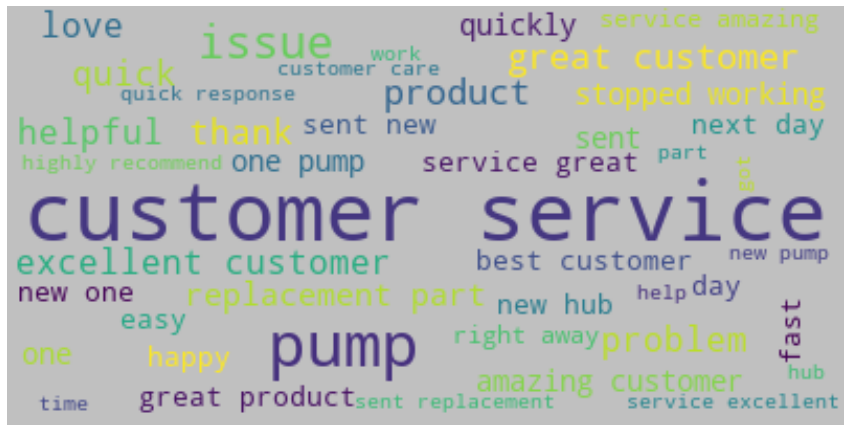

In [14]:
# Create word clouds of the most common words in Top (5 star) Reviews.
plot_wordcloud(text=top_rated_review_words, word_max=50, cm='viridis', bg_color='silver')

## 4-3 Star Review Text Analysis

### 4-3 Star reviews mention "customer service" but without as many positive adjectives.  

### There is a mix of positive ("love", "helpful", "happy", "easy"), neutural ("pump", "pelvic floor", "time", "product", "hands free" ), and negative ("issue", "stopped working", "leak", "problem") words. 

### This analysis could imply that the customer experience was mainly positive but these reviewers had less feedback for the customer service team. The frequently mentioned products are the "pump" and "pelvic floor" products.
 

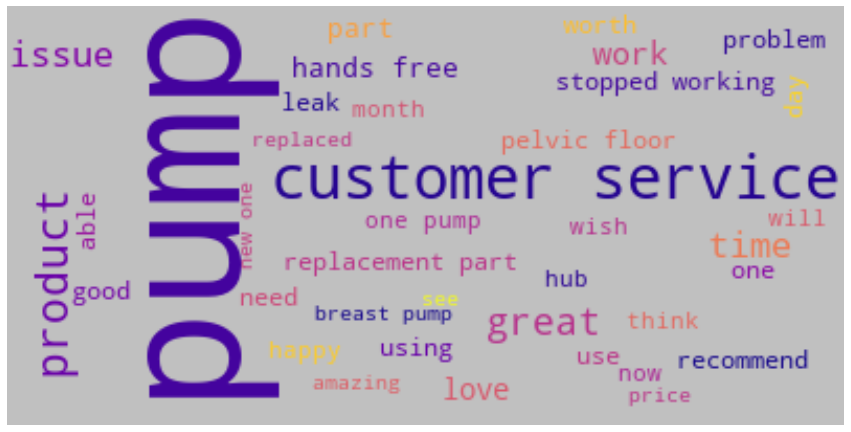

In [15]:
# Create word clouds of the most common words in Mid (4-3 star) Reviews.
plot_wordcloud(text=mid_rated_review_words, word_max=50, cm='plasma', bg_color='silver')


## 1-2 Star Review Text Analysis

###  1-2 Star reviews mention "customer service" but without as many positive adjectives. 

### There is a mix of positive ("recommend", "great", "good"), neutural ("breast shield", "pump", "product", "suction", "money"), and negative ("disappointed", "stopped working", "expensive", "issue", "waste money") words. 

### This anlysis could imply that product cost was seen to be a concern as well as product performance. The frequently mentioned products are the "pump" and "breast shield" products. 

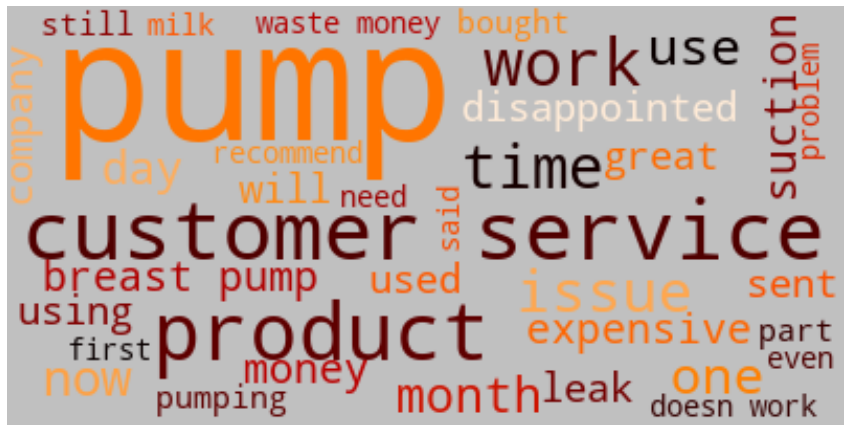

In [16]:
# Create word clouds of the most common words in Low (2-1 star) Reviews.
plot_wordcloud(text=low_rated_review_words, word_max=50, cm='gist_heat', bg_color='silver')

## Recommendations

### 1) To better understand customer sentitment, perform a more detailed anaylysis of the customer review comments to include topic modeling and sentiment analysis using tools like VADER or TextBlob.

### 2) To discover potential influences to the rating "spikes", compare this dataset against internal company data on product sales history, product upgrade history, marketing campaign rollouts, and customer service interaction history, or internal policy changes (such as new customer service procedures or return/replacment policy updates).

### 3) To reduce bias from using a single review source, combine this review dataset with additional customer review datasets sourced from additional review submission channels (ex: other review websites and direct to customer surveys). 